## Looking at Joel Embiid's numbers from the 2019-2020 season, what correlations can be drawn between points, rebounds, and assists/game and the winning or losing margin?

In [21]:
import pandas as pd
import numpy as np
embiid = pd.read_csv (r'C:\Users\blync\Downloads\embiid.csv') #Data copied from basketball reference

In [22]:
embiid

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,10/23/2019,25-221,PHI,NaN,BOS,W (+14),1,11:15:00,...,9,13,3,0,3,0,5,15,13.3,16
1,2,NaN,10/26/2019,25-224,PHI,@,DET,W (+6),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
2,3,2.0,10/28/2019,25-226,PHI,@,ATL,W (+2),1,32:43:00,...,10,13,5,3,1,7,5,36,30.8,9
3,4,3.0,10/30/2019,25-228,PHI,NaN,MIN,W (+22),1,20:02:00,...,4,5,2,1,1,1,2,19,15.2,7
4,5,NaN,11/2/2019,25-231,PHI,@,POR,W (+1),Did Not Play,Did Not Play,...,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,61,NaN,3/1/2020,25-351,PHI,@,LAC,L (-6),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
61,62,NaN,3/3/2020,25-353,PHI,@,LAL,L (-13),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
62,63,NaN,3/5/2020,25-355,PHI,@,SAC,W (+17),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
63,64,NaN,3/7/2020,25-357,PHI,@,GSW,L (-4),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive


In [23]:
embiid.columns

Index(['Rk', 'G', 'Date', 'Age', 'Tm', 'Unnamed: 5', 'Opp', 'Unnamed: 7', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-'],
      dtype='object')

In [47]:
relevant_stats = embiid[['Date', 'Unnamed: 7', 'MP', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
relevant_stats

,Date,Unnamed: 7,MP,TRB,AST,STL,BLK,TOV,PF,PTS
0,10/23/2019,W (+14),11:15:00,13,3,0,3,0,5,15
1,10/26/2019,W (+6),Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
2,10/28/2019,W (+2),32:43:00,13,5,3,1,7,5,36
3,10/30/2019,W (+22),20:02:00,5,2,1,1,1,2,19
4,11/2/2019,W (+1),Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play
...,...,...,...,...,...,...,...,...,...,...
60,3/1/2020,L (-6),Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
61,3/3/2020,L (-13),Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
62,3/5/2020,W (+17),Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
63,3/7/2020,L (-4),Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive


In [48]:
relevant_stats2 = relevant_stats.rename(columns={"Unnamed: 7": "Point_Margin",})
relevant_stats2[['W_or_L', 'Dif']] = relevant_stats2['Point_Margin'].str.split('(', expand=True)
relevant_stats3 = relevant_stats2.drop(['Point_Margin'], axis=1)
relevant_stats3 ['Dif'] = relevant_stats3['Dif'].str.replace(')','').str.replace('+','')
relevant_stats3.drop(relevant_stats3[relevant_stats3['TRB']=='Inactive'].index, inplace=True)
relevant_stats3.drop(relevant_stats3[relevant_stats3['TRB']=='Did Not Play'].index, inplace=True)
relevant_stats3.drop(columns = ['W_or_L'])

,Date,MP,TRB,AST,STL,BLK,TOV,PF,PTS,Dif
0,10/23/2019,11:15:00,13,3,0,3,0,5,15,14
2,10/28/2019,32:43:00,13,5,3,1,7,5,36,2
3,10/30/2019,20:02:00,5,2,1,1,1,2,19,22
6,11/6/2019,35:50:00,16,3,0,2,3,5,27,-2
7,11/8/2019,28:30:00,15,2,0,1,8,6,19,-3
8,11/10/2019,25:48:00,9,3,2,2,2,2,18,8
9,11/12/2019,35:05:00,16,4,1,2,2,2,27,1
11,11/15/2019,37:38:00,12,2,1,0,1,4,31,-8
12,11/17/2019,22:31:00,4,2,1,1,2,3,14,19
13,11/20/2019,33:39:00,12,5,0,1,3,3,23,5


In [49]:
relevant_stats3['MP'] = relevant_stats3['MP'].astype(str)
relevant_stats3[['Min', 'Sec', 'Mill']] = relevant_stats3['MP'].str.split(':', expand = True)
relevant_stats3['Min'] = relevant_stats3['Min'].astype(float)
relevant_stats3['Sec'] = relevant_stats3['Sec'].astype(float)
relevant_stats3['Mill'] = relevant_stats3['Mill'].astype(float)
relevant_stats3['Sec'] = relevant_stats3['Sec']/60
relevant_stats3['Mill'] = relevant_stats3['Mill']/60000
relevant_stats3['Min'] = relevant_stats3['Min'] + relevant_stats3['Sec'] + relevant_stats3['Mill']

In [50]:
finalstats = relevant_stats3


In [51]:
finalstats['TRB'] = finalstats['TRB'].astype(float)
finalstats['PTS'] = finalstats['PTS'].astype(float)
finalstats['AST'] = finalstats['AST'].astype(float)
finalstats['Dif'] = finalstats['Dif'].astype(float)

In [56]:
finalstats = finalstats.drop(columns = ['MP', 'W_or_L', 'Sec', 'Mill'])
finalstats

,Date,TRB,AST,STL,BLK,TOV,PF,PTS,Dif,Min
0,10/23/2019,13.0,3.0,0,3,0,5,15.0,14.0,11.250000
2,10/28/2019,13.0,5.0,3,1,7,5,36.0,2.0,32.716667
3,10/30/2019,5.0,2.0,1,1,1,2,19.0,22.0,20.033333
6,11/6/2019,16.0,3.0,0,2,3,5,27.0,-2.0,35.833333
7,11/8/2019,15.0,2.0,0,1,8,6,19.0,-3.0,28.500000
8,11/10/2019,9.0,3.0,2,2,2,2,18.0,8.0,25.800000
9,11/12/2019,16.0,4.0,1,2,2,2,27.0,1.0,35.083333
11,11/15/2019,12.0,2.0,1,0,1,4,31.0,-8.0,37.633333
12,11/17/2019,4.0,2.0,1,1,2,3,14.0,19.0,22.516667
13,11/20/2019,12.0,5.0,0,1,3,3,23.0,5.0,33.650000


In [60]:
finalstats['Reb/min'] = finalstats['TRB']/finalstats['Min']
finalstats['Ast/min'] = finalstats['AST']/finalstats['Min']
finalstats['Pts/min'] = finalstats['PTS']/finalstats['Min']

In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt

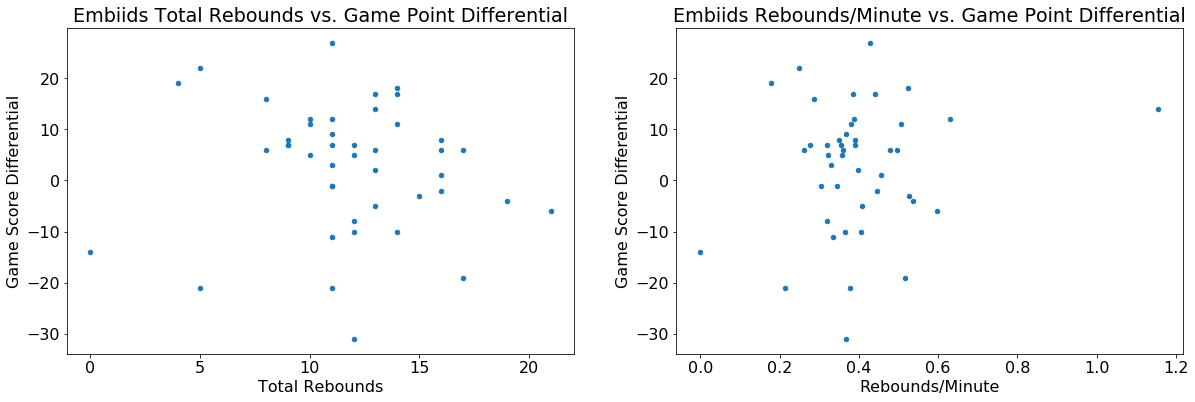

In [168]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)

finalstats.plot(kind='scatter', x='TRB', y='Dif', figsize=(20, 6), ax = ax0)
ax0.set_title('Embiids Total Rebounds vs. Game Point Differential')
ax0.set_xlabel('Total Rebounds')
ax0.set_ylabel('Game Score Differential')
mpl.rcParams.update({'font.size': 16})

finalstats.plot(kind='scatter', x='Reb/min', y = 'Dif', figsize=(20, 6), ax = ax1)
ax1.set_title('Embiids Rebounds/Minute vs. Game Point Differential')
ax1.set_xlabel('Rebounds/Minute')
ax1.set_ylabel('Game Score Differential')
mpl.rcParams.update({'font.size': 16})

plt.show()

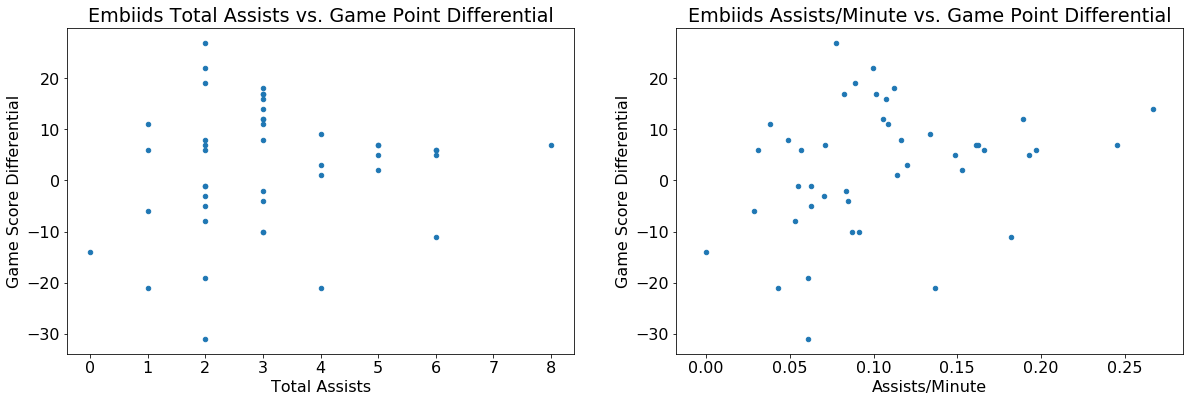

In [171]:
fig2 = plt.figure()

ax2 = fig2.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax3 = fig2.add_subplot(1, 2, 2)

finalstats.plot(kind='scatter', x='AST', y='Dif', figsize=(20, 6), ax = ax2)
ax2.set_title('Embiids Total Assists vs. Game Point Differential')
ax2.set_xlabel('Total Assists')
ax2.set_ylabel('Game Score Differential')
mpl.rcParams.update({'font.size': 16})

finalstats.plot(kind='scatter', x='Ast/min', y = 'Dif', figsize=(20, 6), ax = ax3)
ax3.set_title('Embiids Assists/Minute vs. Game Point Differential')
ax3.set_xlabel('Assists/Minute')
ax3.set_ylabel('Game Score Differential')
mpl.rcParams.update({'font.size': 16})

plt.show()

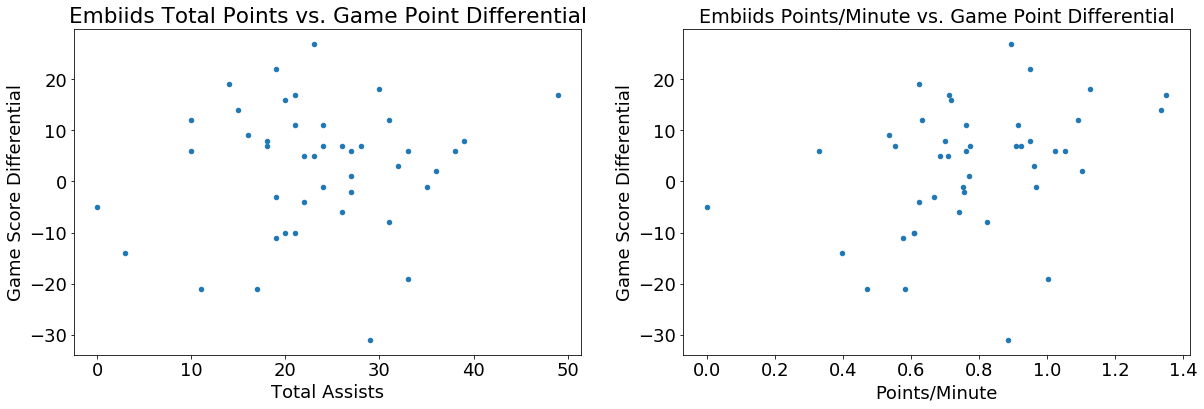

In [173]:
fig3 = plt.figure()

ax4 = fig3.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax5 = fig3.add_subplot(1, 2, 2)

finalstats.plot(kind='scatter', x='PTS', y='Dif', figsize=(20, 6), ax = ax4)
ax4.set_title('Embiids Total Points vs. Game Point Differential')
ax4.set_xlabel('Total Assists')
ax4.set_ylabel('Game Score Differential')
mpl.rcParams.update({'font.size': 16})

finalstats.plot(kind='scatter', x='Pts/min', y = 'Dif', figsize=(20, 6), ax = ax5)
ax5.set_title('Embiids Points/Minute vs. Game Point Differential')
ax5.set_xlabel('Points/Minute')
ax5.set_ylabel('Game Score Differential')
mpl.rcParams.update({'font.size': 16})

plt.show()

### Through these analyses, it is clear that the per minute statistics correlate much more the game score differential.  Therefore, we will use these in our regression analyses

In [97]:
#Linear Regression for each dataset
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets

In [176]:
a = finalstats[['Reb/min']]
b = finalstats[['Ast/min']]
c = finalstats[['Pts/min']]
y = finalstats[['Dif']]

lm2 = LinearRegression()
lm2.fit(finalstats[['Reb/min']], finalstats['Dif'])
Reb_coef = lm2.coef_
Reb_int = lm2.intercept_
Reb_x = np.linspace(0, 1.2, 44)
Reb_line = Reb_coef * Reb_x + Reb_int
Reb_r2 = metrics.r2_score(y, Reb_line)

lm3 = LinearRegression()
lm3.fit(finalstats[['Ast/min']], finalstats['Dif'])
Ast_coef = lm3.coef_
Ast_int = lm3.intercept_
Ast_x = np.linspace(0, 0.3, 44)
Ast_line = Ast_coef * Ast_x + Ast_int
Ast_r2 = metrics.r2_score(y, Ast_line)

lm4 = LinearRegression()
lm4.fit(finalstats[['Pts/min']], finalstats['Dif'])
Pts_coef = lm4.coef_
Pts_int = lm4.intercept_
Pts_x = np.linspace(0, 1.4, 44)
Pts_line = Pts_coef * Pts_x + Pts_int
Pts_r2 = metrics.r2_score(y, Pts_line)

In [177]:
r2_coeffs = [Reb_r2, Ast_r2, Pts_r2]
r2_coeffs

[-0.3284361003908336, -0.44152459305547676, -0.6195435927067507]

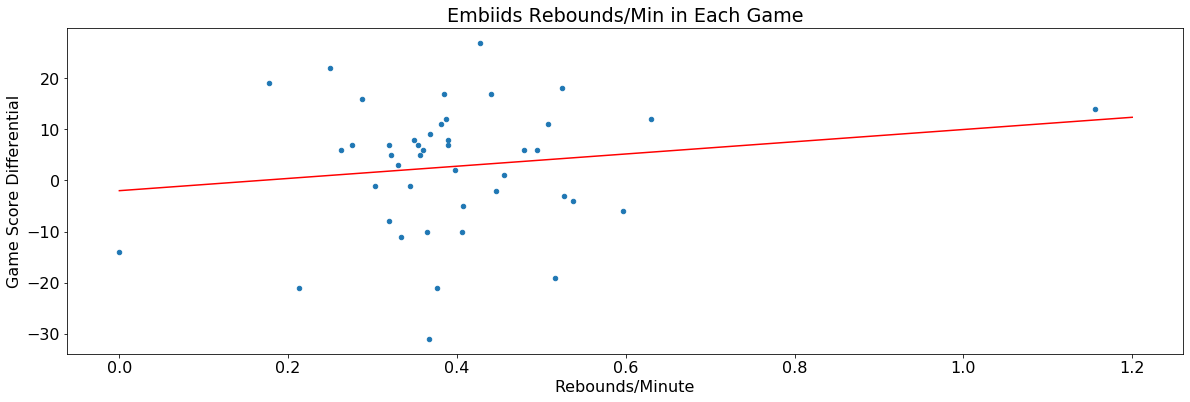

In [178]:
finalstats.plot(kind='scatter', x='Reb/min', y = 'Dif', figsize=(20, 6))
plt.title('Embiids Rebounds/Min in Each Game')
plt.xlabel('Rebounds/Minute')
plt.ylabel('Game Score Differential')
plt.plot(Reb_x, Reb_line, color='red')

plt.show()

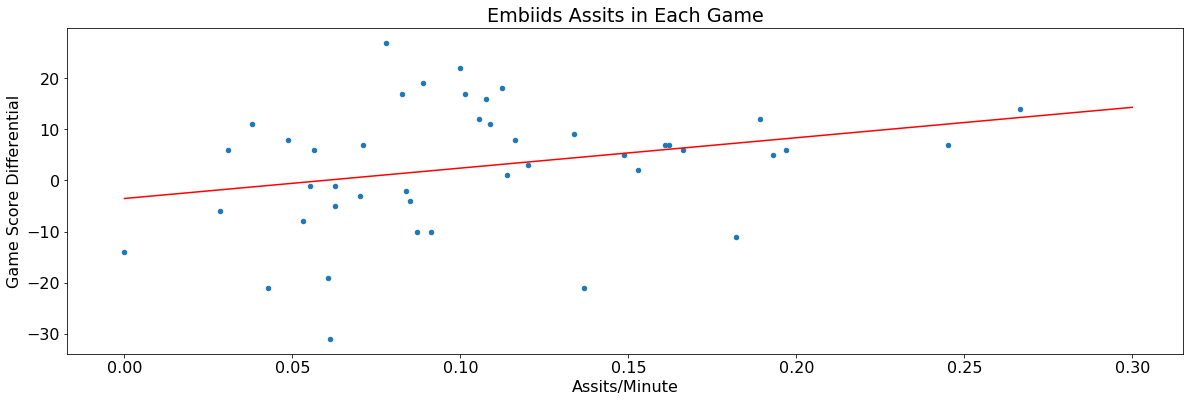

In [179]:
finalstats.plot(kind='scatter', x='Ast/min', y = 'Dif', figsize=(20, 6))
plt.title('Embiids Assits in Each Game')
plt.xlabel('Assits/Minute')
plt.ylabel('Game Score Differential')
plt.plot(Ast_x, Ast_line, color='red')

plt.show()

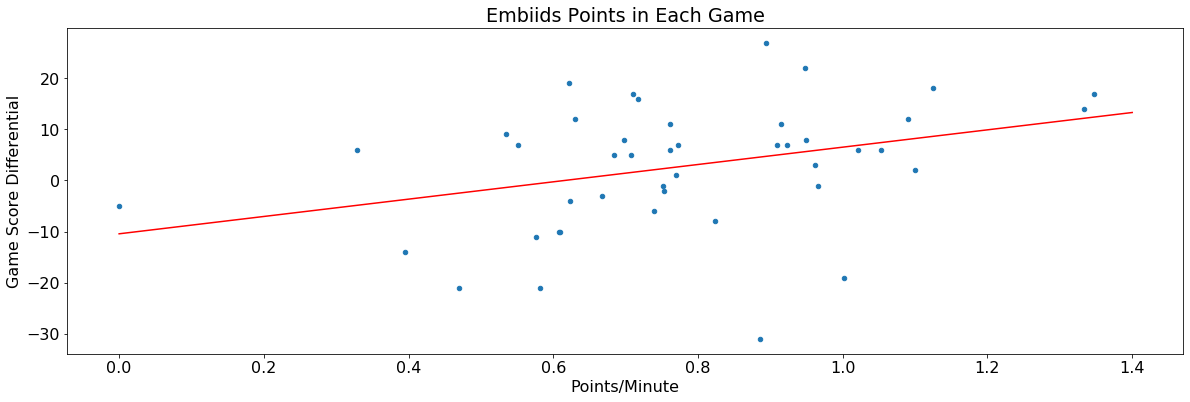

In [180]:
finalstats.plot(kind='scatter', x='Pts/min', y = 'Dif', figsize=(20, 6))
plt.title('Embiids Points in Each Game')
plt.xlabel('Points/Minute')
plt.ylabel('Game Score Differential')
plt.plot(Pts_x, Pts_line, color='red')

plt.show()

In [220]:
tied_pts = (1-Pts_int)/Pts_coef
tied_ast = (1-Ast_int)/Ast_coef
tied_rbd = (1-Reb_int)/Reb_coef
thirty_pts = tied_pts * 30
thirty_ast = tied_ast * 30
thirty_rbd = tied_rbd * 30

print("In order for the Sixers to win the game, Embiid should have " + "{:.2f}".format(tied_pts[0]) + " points/minute, " + "{:.2f}".format(tied_ast[0]) + " assists/minute and " + "{:.2f}".format(tied_rbd[0]) + " rebounds/minute.")
print('If Embiid plays for 30 minutes, this means ' + "{:.2f}".format(thirty_pts[0]) + ' points, ' + "{:.2f}".format(thirty_ast[0]) + ' assists and ' + "{:.2f}".format(thirty_rbd[0]) + ' rebounds.')

In order for the Sixers to win the game, Embiid should have 0.67 points/minute, 0.08 assists/minute and 0.25 rebounds/minute.
If Embiid plays for 30 minutes, this means 20.23 points, 2.28 assists and 7.50 rebounds.


In [221]:
lm4 = LinearRegression()
lm4.fit(finalstats[['Reb/min', 'Ast/min', 'Pts/min']], finalstats['Dif'])
All_coef = lm4.coef_
All_int = lm4.intercept_

In [224]:
print('The equation to determine the score differential based on Embiids performance is: ' + "{:.2f}".format(All_coef[0]) + ' * rebounds/minute + ' + "{:.2f}".format(All_coef[1]) + ' * assists/minute + ' + "{:.2f}".format(All_coef[2]) + ' * points/minute + ' + "{:.2f}".format(All_int) + '.')

The equation to determine the score differential based on Embiids performance is: -5.77 * rebounds/minute + 59.95 * assists/minute + 17.62 * points/minute + -15.00.
